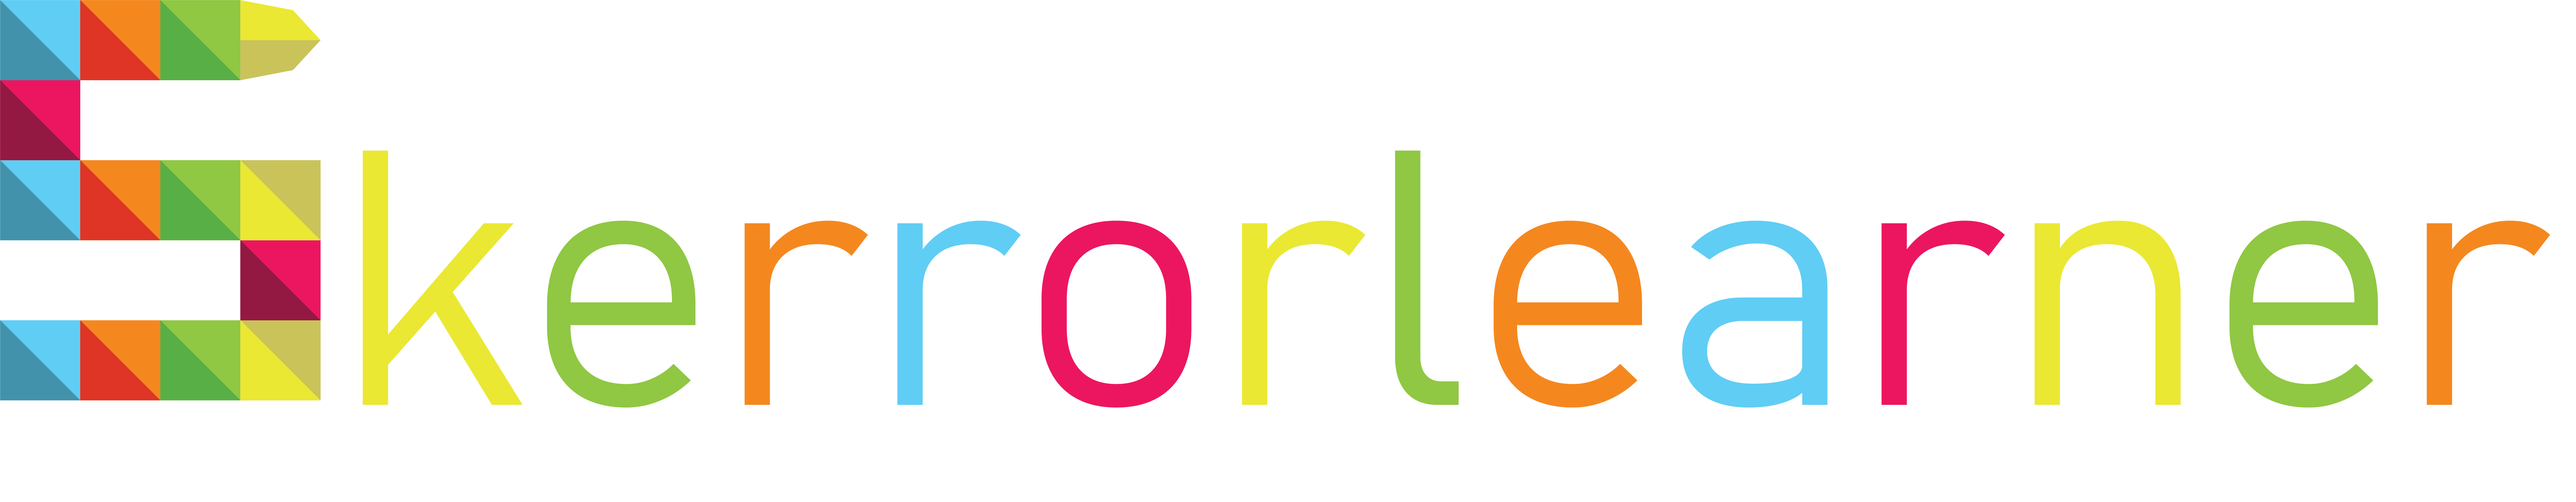

### Importing important libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['axes.facecolor'] = 'white'
sns.set(style='whitegrid')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy import stats
import pylab

from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.feature_selection import RFE

from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_log_error,r2_score

# Importing Skerrorlearner
from skerrorlearner.learn_error import LearnRegressionError
from skerrorlearner.learn_error import ProductionPredictionGeneration

import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

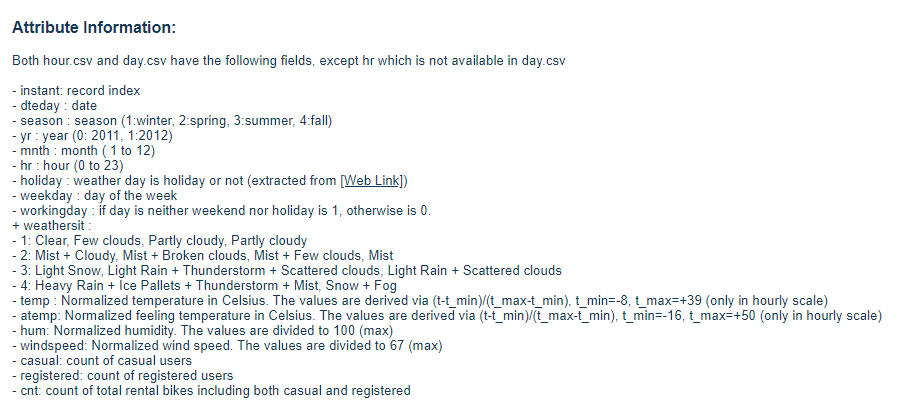

In [2]:
df=pd.read_csv('./hour.csv')

In [3]:
df.shape

(17379, 17)

In [4]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Applying a Train-Test Split

In [5]:
# All the required Exporatory Data Analysis and Feature Engineering is skipped as this notebook is for the demo of Skerrorlearner Library

tr = df.loc[:12164] # training set
va = df.loc[12165:14771] # validation set
ts = df.loc[14772:] # testing set

print(tr.shape)
print(va.shape)
print(ts.shape)

(12165, 17)
(2607, 17)
(2607, 17)


In [6]:
# feedable features
feat = [
        'season',
        'yr',
        'mnth',
        'hr',
        'holiday',
        'weekday',
        'workingday',
        'weathersit',
        'temp',
        'atemp',
        'hum',
        'windspeed'
        ]

In [7]:
# Linear Regression
lr=LinearRegression()
lr.fit(tr[feat],tr['cnt'])
lr_pred_va=lr.predict(va[feat])
lr_pred_ts=lr.predict(ts[feat])
print('Linear Regression')
print('MAE='+str(mean_absolute_error(va['cnt'],lr_pred_va))+" RMSE="+str(np.sqrt(mean_squared_error(va['cnt'],lr_pred_va)))+" R2-SCORE="+str(r2_score(va['cnt'],lr_pred_va)))
print('MAE='+str(mean_absolute_error(ts['cnt'],lr_pred_ts))+" RMSE="+str(np.sqrt(mean_squared_error(ts['cnt'],lr_pred_ts)))+" R2-SCORE="+str(r2_score(ts['cnt'],lr_pred_ts)))
print('\n')

# Support Vector Machine
svr=SVR()
svr.fit(tr[feat],tr['cnt'])
svr_pred_va=svr.predict(va[feat])
svr_pred_ts=svr.predict(ts[feat])
print('Support Vector Machine')
print('MAE='+str(mean_absolute_error(va['cnt'],svr_pred_va))+" RMSE="+str(np.sqrt(mean_squared_error(va['cnt'],svr_pred_va)))+" R2-SCORE="+str(r2_score(va['cnt'],svr_pred_va)))
print('MAE='+str(mean_absolute_error(ts['cnt'],svr_pred_ts))+" RMSE="+str(np.sqrt(mean_squared_error(ts['cnt'],svr_pred_ts)))+" R2-SCORE="+str(r2_score(ts['cnt'],svr_pred_ts)))
print('\n')

# Random Forest
rf=RandomForestRegressor()
rf.fit(tr[feat],tr['cnt'])
rf_pred_va=rf.predict(va[feat])
rf_pred_ts=rf.predict(ts[feat])
print('Random Forest')
print('MAE='+str(mean_absolute_error(va['cnt'],rf_pred_va))+" RMSE="+str(np.sqrt(mean_squared_error(va['cnt'],rf_pred_va)))+" R2-SCORE="+str(r2_score(va['cnt'],rf_pred_va)))
print('MAE='+str(mean_absolute_error(ts['cnt'],rf_pred_ts))+" RMSE="+str(np.sqrt(mean_squared_error(ts['cnt'],rf_pred_ts)))+" R2-SCORE="+str(r2_score(ts['cnt'],rf_pred_ts)))
print('\n')

# AdaBoost
ada=AdaBoostRegressor()
ada.fit(tr[feat],tr['cnt'])
ada_pred_va=ada.predict(va[feat])
ada_pred_ts=ada.predict(ts[feat])
print('AdaBoost')
print('MAE='+str(mean_absolute_error(va['cnt'],ada_pred_va))+" RMSE="+str(np.sqrt(mean_squared_error(va['cnt'],ada_pred_va)))+" R2-SCORE="+str(r2_score(va['cnt'],ada_pred_va)))
print('MAE='+str(mean_absolute_error(ts['cnt'],ada_pred_ts))+" RMSE="+str(np.sqrt(mean_squared_error(ts['cnt'],ada_pred_ts)))+" R2-SCORE="+str(r2_score(ts['cnt'],ada_pred_ts)))
print('\n')

# GradientBoost
gbm=GradientBoostingRegressor()
gbm.fit(tr[feat],tr['cnt'])
gbm_pred_va=gbm.predict(va[feat])
gbm_pred_ts=gbm.predict(ts[feat])
print('GradientBoost')
print('MAE='+str(mean_absolute_error(va['cnt'],gbm_pred_va))+" RMSE="+str(np.sqrt(mean_squared_error(va['cnt'],gbm_pred_va)))+" R2-SCORE="+str(r2_score(va['cnt'],gbm_pred_va)))
print('MAE='+str(mean_absolute_error(ts['cnt'],gbm_pred_ts))+" RMSE="+str(np.sqrt(mean_squared_error(ts['cnt'],gbm_pred_ts)))+" R2-SCORE="+str(r2_score(ts['cnt'],gbm_pred_ts)))
print('\n')

# XGBoost
xgb=XGBRegressor()
xgb.fit(tr[feat],tr['cnt'])
xgb_pred_va=xgb.predict(va[feat])
xgb_pred_ts=xgb.predict(ts[feat])
print('XGBoost')
print('MAE='+str(mean_absolute_error(va['cnt'],xgb_pred_va))+" RMSE="+str(np.sqrt(mean_squared_error(va['cnt'],xgb_pred_va)))+" R2-SCORE="+str(r2_score(va['cnt'],xgb_pred_va)))
print('MAE='+str(mean_absolute_error(ts['cnt'],xgb_pred_ts))+" RMSE="+str(np.sqrt(mean_squared_error(ts['cnt'],xgb_pred_ts)))+" R2-SCORE="+str(r2_score(ts['cnt'],xgb_pred_ts)))
print('\n')

# LightGBM
lgbm=LGBMRegressor()
lgbm.fit(tr[feat],tr['cnt'])
lgbm_pred_va=lgbm.predict(va[feat])
lgbm_pred_ts=lgbm.predict(ts[feat])
print('LightGBM')
print('MAE='+str(mean_absolute_error(va['cnt'],lgbm_pred_va))+" RMSE="+str(np.sqrt(mean_squared_error(va['cnt'],lgbm_pred_va)))+" R2-SCORE="+str(r2_score(va['cnt'],lgbm_pred_va)))
print('MAE='+str(mean_absolute_error(ts['cnt'],lgbm_pred_ts))+" RMSE="+str(np.sqrt(mean_squared_error(ts['cnt'],lgbm_pred_ts)))+" R2-SCORE="+str(r2_score(ts['cnt'],lgbm_pred_ts)))
print('\n')

# KNN
knn=KNeighborsRegressor()
knn.fit(tr[feat],tr['cnt'])
knn_pred_va=knn.predict(va[feat])
knn_pred_ts=knn.predict(ts[feat])
print('KNN')
print('MAE='+str(mean_absolute_error(va['cnt'],knn_pred_va))+" RMSE="+str(np.sqrt(mean_squared_error(va['cnt'],knn_pred_va)))+" R2-SCORE="+str(r2_score(va['cnt'],knn_pred_va)))
print('MAE='+str(mean_absolute_error(ts['cnt'],knn_pred_ts))+" RMSE="+str(np.sqrt(mean_squared_error(ts['cnt'],knn_pred_ts)))+" R2-SCORE="+str(r2_score(ts['cnt'],knn_pred_ts)))
print('\n')

Linear Regression
MAE=155.34072378420595 RMSE=189.7351847881946 R2-SCORE=0.277606915514121
MAE=137.52308989533202 RMSE=179.28719401015152 R2-SCORE=0.30527489999699775


Support Vector Machine
MAE=146.6452581380142 RMSE=219.56158545556983 R2-SCORE=0.032634606437319746
MAE=127.8613936883328 RMSE=201.56421405387056 R2-SCORE=0.12190539579955095


Random Forest
MAE=48.63544035289605 RMSE=76.7154222059108 R2-SCORE=0.8819018241130548
MAE=49.91676575885437 RMSE=74.49928570764217 R2-SCORE=0.8800449138112754


AdaBoost
MAE=114.94538353970543 RMSE=139.7419065178675 R2-SCORE=0.6081397973061308
MAE=101.51233798226843 RMSE=131.93878595644193 R2-SCORE=0.6237648072559336


GradientBoost
MAE=76.6149343299858 RMSE=104.64115794031144 R2-SCORE=0.7802732640717066
MAE=76.43022919116463 RMSE=112.68937697498825 R2-SCORE=0.7255391492698315


XGBoost
MAE=50.55295243098086 RMSE=71.84118506319291 R2-SCORE=0.8964321869042539
MAE=48.795589845054536 RMSE=72.84838928534202 R2-SCORE=0.8853023930137109


LightGBM
MAE=4

#### The best performing algorithm on the dataset as seen in LightGBM.
* Also, we are not applying any Feature Selection method or any Hyperparameter Tuning methods as this notebook is for the demo of Skerrorlearner Library.

### Testing LearnRegressionError

* This class is for learning error of Current Model for Regression use cases.

In [30]:
train_set = tr.copy()
validation_set = va.copy()
test_set = ts.copy()
current_model_features_list = feat.copy()
output_label = 'cnt'
current_model = lgbm
focus_metric = 'rmse'
include_predictions = True

In [31]:
# Creating the Error Learning object for Regression use case. You can check docstring for documentation support.

lre=LearnRegressionError(
    train_set,
    validation_set,
    test_set,
    current_model_features_list,
    output_label,
    current_model,
    focus_metric,
    include_predictions
)

In [32]:
# This method generates predictions using the current model provided and computes the error of the same.

lre.fit_current_model()

In [33]:
# Optional Step - Building features using predictions from the current_model
# Just applying some transformation to show how feature engineering works with Skerrorlearner Library

lre.train['Current Model Predictions Sqrt'] = np.sqrt(lre.train['Current Model Predictions'])
lre.validation['Current Model Predictions Sqrt'] = np.sqrt(lre.validation['Current Model Predictions'])
lre.test['Current Model Predictions Sqrt'] = np.sqrt(lre.test['Current Model Predictions'])

lre.train['Current Model Predictions Sqrt'].fillna(0,inplace=True)
lre.validation['Current Model Predictions Sqrt'].fillna(0,inplace=True)
lre.test['Current Model Predictions Sqrt'].fillna(0,inplace=True)

In [34]:
# Error Model feature list in the object before updation
lre.er_model_features_list

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'Current Model Predictions']

In [35]:
updated_er_model_features_list = ['season',
                                  'yr',
                                  'mnth',
                                  'hr',
                                  'holiday',
                                  'weekday',
                                  'workingday',
                                  'weathersit',
                                  'temp',
                                  'atemp',
                                  'hum',
                                  'windspeed',
                                  #'Current Model Predictions',
                                  'Current Model Predictions Sqrt']

lre.update_er_model_features_list(updated_er_model_features_list)

In [36]:
# Updated Error Model Features list
lre.er_model_features_list

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'Current Model Predictions Sqrt']

In [37]:
# This method fits and computes the Error Learning model.

lre.er_fit_and_predict()

In [40]:
# Checking the best performing algorithm

lre.error_model_algorithm

'SVR'

In [39]:
# Checking the performance dataframe for all the models

lre.algorithm_performance_df

,Trained Model,Error Model Predictions Validation,Error Model Predictions Test,Final Output Validation,Final Output Test,Error Model Validation MAE,Error Model Validation RMSE,Error Model Validation RMSLE,Error Model Validation R2-Score,Error Model Test MAE,Error Model Test RMSE,Error Model Test RMSLE,Error Model Test R2-Score,Final Output Validation MAE,Final Output Validation RMSE,Final Output Validation RMSLE,Final Output Validation R2-Score,Final Output Test MAE,Final Output Test RMSE,Final Output Test RMSLE,Final Output Test R2-Score
SVR,SVR(),"[-2.825573437789288, -4.43871015597046, -4.060...","[10.571373680960072, 10.561886028830353, 7.587...","[68.35767769933089, 34.507652135973636, 13.512...","[764.8121491502809, 769.8221944628908, 551.683...",45.4653,66.5979,NaN,-0.0253296,46.2728,69.721,NaN,-0.0432181,45.4653,66.5979,NaN,0.910998,46.2728,69.721,NaN,0.894939
Gradient Boosting,([DecisionTreeRegressor(criterion='friedman_ms...,"[1.040688901177392, -4.5506442812245265, -3.28...","[48.48583492306809, 28.388711384665672, 4.0331...","[72.22394003829757, 34.39571801071957, 14.2860...","[802.7266103923889, 787.6490198187262, 548.129...",45.2681,66.7845,NaN,-0.0310815,46.0111,69.7756,NaN,-0.0448508,45.2681,66.7845,NaN,0.910499,46.0111,69.7756,NaN,0.894774
Light GBM,LGBMRegressor(),"[3.537328947169325, -10.643626700023223, -5.21...","[11.639969559063871, 18.507446858092937, 2.851...","[74.72058008428951, 28.302735591920875, 12.361...","[765.8807450283847, 777.7677552921534, 546.947...",45.2833,66.8581,NaN,-0.0333564,45.7417,69.3401,NaN,-0.0318488,45.2833,66.8581,NaN,0.910301,45.7417,69.3401,NaN,0.896084
Random Forest,"(DecisionTreeRegressor(max_features='auto', ra...","[7.959939460115557, 2.499281198692898, -7.7822...","[38.85354505855039, 38.43137873505471, 2.32224...","[79.14319059723573, 41.445643490636996, 9.7904...","[793.0943205278712, 797.6916871691152, 546.418...",44.2134,67.1006,NaN,-0.0408645,45.2999,69.1968,NaN,-0.0275883,44.2134,67.1006,NaN,0.90965,45.2999,69.1968,NaN,0.896513
Linear Regression,LinearRegression(),"[-1.2690285331117193, -2.4758520365066854, -2....","[5.610649433026671, 5.135664177110616, 2.40136...","[69.91422260400846, 36.47051025543741, 14.6780...","[759.8514249023475, 764.395972611171, 546.4975...",46.0114,67.4701,NaN,-0.0523607,46.7189,70.3534,NaN,-0.0622286,46.0114,67.4701,NaN,0.908652,46.7189,70.3534,NaN,0.893024
XG Boost,"XGBRegressor(base_score=0.5, booster='gbtree',...","[1.0712224, 3.563913, -7.2872925, -5.7744045, ...","[21.539238, 34.15647, -13.195803, 13.518627, 7...","[72.25447356162732, 42.51027539886243, 10.2854...","[775.7800134453951, 793.4167796865019, 530.900...",45.3053,67.6791,NaN,-0.0588888,45.8771,70.3237,NaN,-0.0613306,45.3053,67.6791,NaN,0.908085,45.8771,70.3237,NaN,0.893115
KNearest Neighbors,KNeighborsRegressor(),"[10.77293364608293, -0.38123581847182564, -3.1...","[-18.7712573435824, -18.7712573435824, 14.7848...","[81.95618478320311, 38.565126473472276, 14.430...","[735.4695181257384, 740.489051090478, 558.8809...",46.5433,69.1393,NaN,-0.105076,46.9581,71.3147,NaN,-0.0914546,46.5433,69.1393,NaN,0.904076,46.9581,71.3147,NaN,0.890081
Ada Boost,"(DecisionTreeRegressor(max_depth=3, random_sta...","[-1.6316810266244166, -1.6316810266244166, -0....","[1.137401276769078, -19.1499204147799, -19.149...","[69.55157011049576, 37.314681265319685, 17.023...","[755.3781767460899, 740.1103880192805, 524.946...",49.0059,71.9497,NaN,-0.196739,50.8371,75.3558,NaN,-0.218655,49.0059,71.9497,NaN,0.896119,50.8371,75.3558,NaN,0.877271
Decision Tree,DecisionTreeRegressor(),"[9.439002635269262, -11.827664841509446, -12.8...","[-13.001083760943857, 111.8548596278664, -72.9...","[80.62225377238944, 27.118697450434652, 4.7631...","[741.239691708377, 871.1151680619269, 471.1948...",51.3333,75.8618,NaN,-0.330419,52.7473,81.4049,NaN,-0.422162,51.3333,75.8618,NaN,0.884515,52.7473,81.4049,NaN,0.856776


#### Here, as we see, the best performing algorithm is Support Vector Regressor.

In [48]:
# Let's say you're solving hackathon and you need prediction on the test set provided by the Hackathon Commitee,
# Let the test set be our own test set for the sake of demo purpose.
final_prediction_set = ts.copy()

# Features for predicting using the current model is to be built here. But as raw features are used, the fields are pased directly.

# Generating predictions via current_model
final_prediction_set = lre.predict_current_model(final_prediction_set)

# Replicating additional Feature Engineering in final_prediction_set which was done using current_model predictions
final_prediction_set['Current Model Predictions Sqrt'] = np.sqrt(final_prediction_set['Current Model Predictions'])
final_prediction_set['Current Model Predictions Sqrt'].fillna(0,inplace=True)

# Generating predictions via error_model
final_prediction_set = lre.predict_er_model(final_prediction_set)

# Applying Output Transformer
final_prediction_set = lre.output_transformer(final_prediction_set)

In [49]:
# The predictions are stored in the field starting with output_label and ending with "Predictions"

final_prediction_set.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Current Model Predictions,Current Model Predictions Sqrt,Error Model Predictions,cnt Predictions
14772,14773,2012-09-12,3,1,9,17,0,3,1,1,0.70,0.6364,0.41,0.2985,114,811,925,754.240775,27.463444,10.571374,764.812149
14773,14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977,759.260308,27.554679,10.561886,769.822194
14774,14775,2012-09-12,3,1,9,19,0,3,1,1,0.64,0.6212,0.50,0.1940,78,557,635,544.096144,23.325869,7.587398,551.683542
14775,14776,2012-09-12,3,1,9,20,0,3,1,1,0.62,0.6212,0.57,0.1343,38,432,470,368.306124,19.191303,3.727912,372.034036
14776,14777,2012-09-12,3,1,9,21,0,3,1,1,0.60,0.6061,0.60,0.1343,27,279,306,291.734958,17.080251,1.904057,293.639016


### Testing ProductionPredictionGeneration

* This class helps to generate daily predictions. This library is not only restricted to generate predictions for Hackathons but for live data in live systems as well.

In [50]:
# Instantiate production prediction object
ppg = ProductionPredictionGeneration()

In [51]:
# Let's say you're predicting on live data in Production of some system,
# Let the live data set be our own test set for the sake of demo purpose.
# Here the LearnRegressionError variables are used, but in production these variables will not be available.
# Hence, some of the variables need to be exported, like the er_model_features_list and the error_model.
final_prediction_set = ts.copy()
current_model_features_list = lre.current_model_features_list
current_model = lre.current_model

In [52]:
# Features for predicting using the current model is to be built here. But as raw features are used, the fields are pased directly.

# Generating predictions via current_model
final_prediction_set = ppg.regression_predict_current_model_prod(
    final_prediction_set,
    current_model_features_list,
    current_model
)

# Replicating additional Feature Engineering in final_prediction_set which was done using current_model predictions
final_prediction_set['Current Model Predictions Sqrt'] = np.sqrt(final_prediction_set['Current Model Predictions'])
final_prediction_set['Current Model Predictions Sqrt'].fillna(0,inplace=True)

# Here the LearnRegressionError variables are used, but in production these variables will not be available.
# Hence, some of the variables need to be exported, like the er_model_features_list and the error_model.
er_model_features_list = lre.er_model_features_list
error_model = lre.error_model
output_label = 'cnt'

# Generating predictions via error_model
final_prediction_set = ppg.regression_predict_error_model_prod(
    final_prediction_set,
    er_model_features_list,
    error_model,
    output_label,
)

In [53]:
final_prediction_set.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Current Model Predictions,Current Model Predictions Sqrt,Error Model Predictions,cnt Predictions
14772,14773,2012-09-12,3,1,9,17,0,3,1,1,0.70,0.6364,0.41,0.2985,114,811,925,754.240775,27.463444,10.571374,764.812149
14773,14774,2012-09-12,3,1,9,18,0,3,1,1,0.66,0.6212,0.44,0.2537,91,886,977,759.260308,27.554679,10.561886,769.822194
14774,14775,2012-09-12,3,1,9,19,0,3,1,1,0.64,0.6212,0.50,0.1940,78,557,635,544.096144,23.325869,7.587398,551.683542
14775,14776,2012-09-12,3,1,9,20,0,3,1,1,0.62,0.6212,0.57,0.1343,38,432,470,368.306124,19.191303,3.727912,372.034036
14776,14777,2012-09-12,3,1,9,21,0,3,1,1,0.60,0.6061,0.60,0.1343,27,279,306,291.734958,17.080251,1.904057,293.639016
